# BARATHRAJ . T
# Task-1
02 - Intermediate Level
# Prediction using Decision Tree Algorithm :
Create the Decision Tree classifier and visualize it graphically.

The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [ ]:
%%html
<style type='text/css'>
.CodeMirror{
    font-size:18px;
</style>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # seaborn is bases on matplot
sns.set(color_codes=True) # adds a nice background
%matplotlib inline # tells python to actually display the graphs
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree
from os import system

UsageError: unrecognized arguments: # tells python to actually display the graphs


In [ ]:
Data = pd.read_csv('Iris.csv')

In [ ]:
Data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Dropping Id Column
Data.drop('Id',axis=1,inplace = True)
Data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
Data.shape

(150, 5)

In [ ]:
Data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
# Checking for null Values
Data.isnull().values.any()

False

In [ ]:
Data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
Data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [ ]:
Data['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

# Visualization

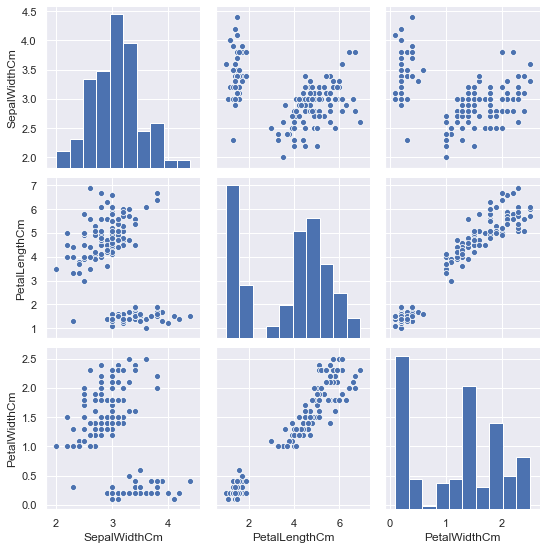

In [ ]:
#Pairplot
sns.pairplot(Data.iloc[:,1:])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000207188505C8>,
      dtype=object)

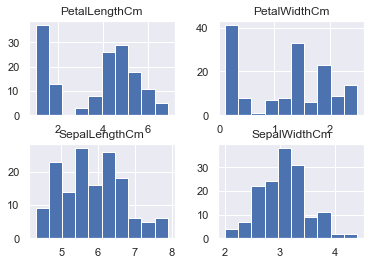

In [ ]:
Data.hist()

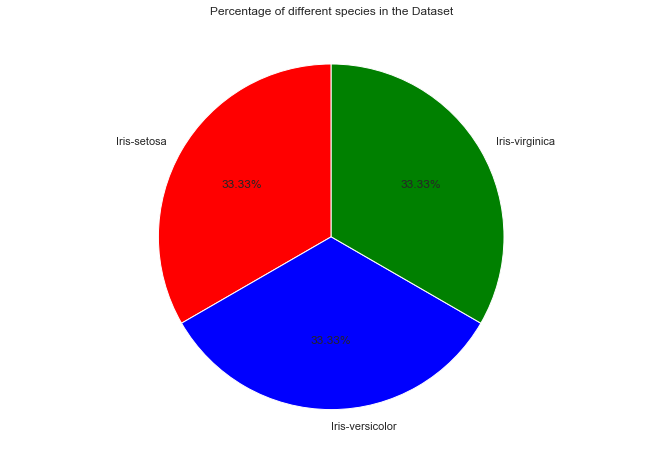

In [ ]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
colors = ['red','blue','green']
sp = Data['Species'].unique()
ct = Data['Species'].value_counts().tolist()
ax.pie(ct, labels = sp, autopct='%1.2f%%', colors=colors, startangle=90)
plt.title('Percentage of different species in the Dataset')
plt.show()


In [ ]:
# Check the Skewness
Data.skew()

SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [ ]:
# Check the dublicates
dupes = Data.duplicated()
dupes

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [ ]:
# There are no Duplicates

<Figure size 720x360 with 0 Axes>

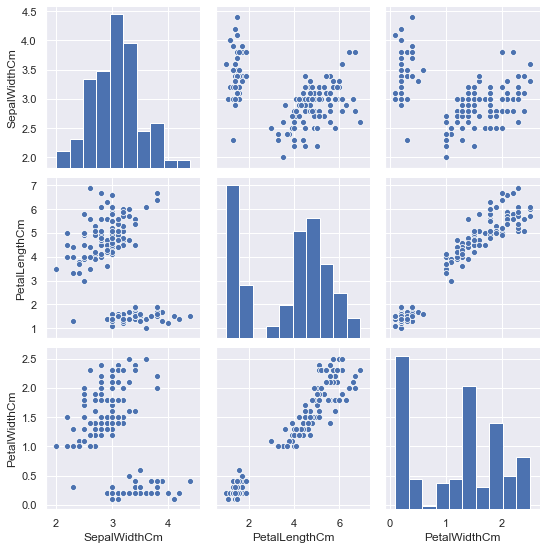

In [ ]:
plt.figure(figsize=(10,5))
sns.pairplot(Data.iloc[:,1:])

# Observation:-

1 .Sepal Length and Sepal Width are Normally Distributed.

2 .Petal Length and Petal Width both are rightly Skewed.

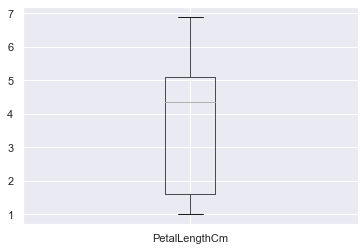

In [ ]:
# Boxplot
Data.boxplot(column='PetalLengthCm')

# Observation:-


1.Q1=1.7

2.Q2=4.4

3.Q3=5.1

In [ ]:
#Check Measure of dispersion
Data.quantile(0.75)-Data.quantile(0.25)

SepalLengthCm    1.3
SepalWidthCm     0.5
PetalLengthCm    3.5
PetalWidthCm     1.5
dtype: float64

# Decision Tree

In [ ]:
Data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
Data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
x = Data.drop('Species', axis=1)
y = Data['Species']

In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=1)

In [ ]:
# Build Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
# Scorring our Decision Tree
print(dTree.score(x_test,y_test))

0.9555555555555556


# Accuracy = 95%

In [ ]:
y_pred = dTree.predict(x_test)
print(y_pred)

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor']


# Plotting The Decision Tree

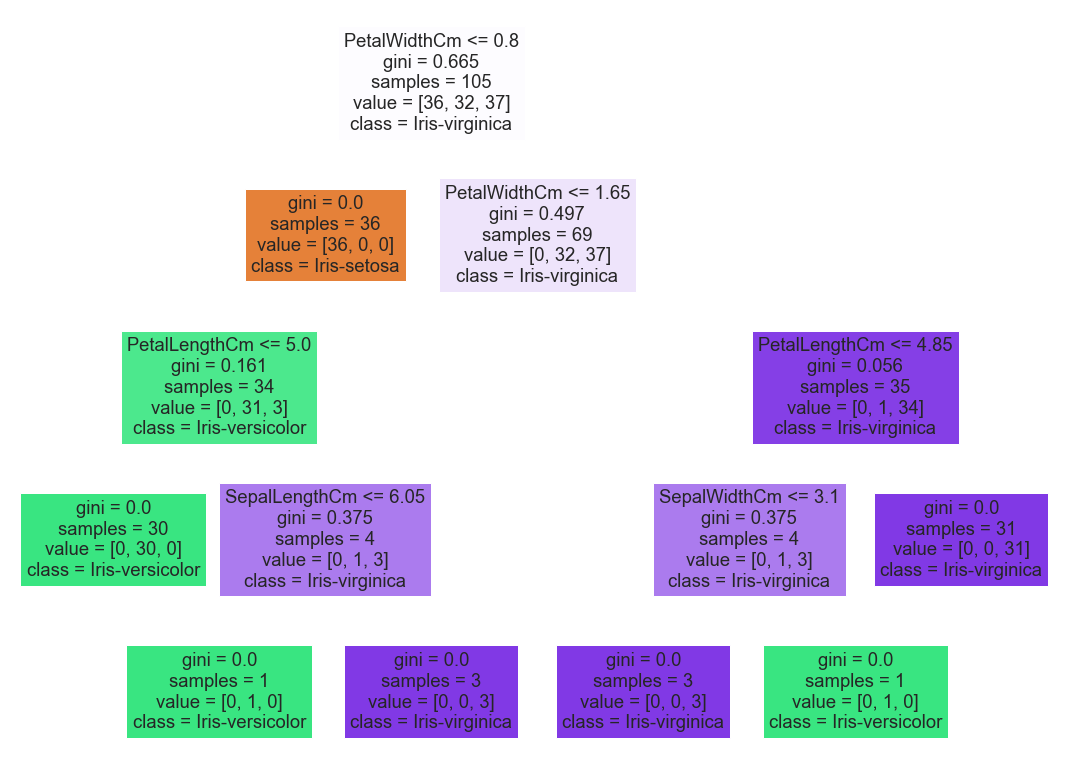

In [ ]:
features = Data.columns[:-1]
classes = Data['Species'].unique().tolist()

from sklearn.tree import plot_tree
plt.figure(figsize=(19, 14))
plot_tree(dTree, feature_names=features, class_names=classes, filled=True)
plt.show()
